In [1]:
import torch
import os
import sys
import yaml
from utils import plot_loss, compute_test_metrics

os.chdir("..")
from src.models.simple_mlp import SimpleMLP
from src.datasets.simple_dataset import SimpleDataset
from torch.utils.data import Subset, DataLoader

%load_ext autoreload
%autoreload 2


In [2]:
import pandas as pd


In [3]:
summary = pd.read_csv("eval/instances_information.csv")
summary.head()

,Unnamed: 0,run time (s),MIP gap (%),objetive function ($)
0,instance_2021_Q1_1,11.64,0.23226,1.383408e+07
1,instance_2021_Q1_2,62.02,0.24963,1.026758e+07
2,instance_2021_Q1_3,31.51,0.24990,9.060249e+06
3,instance_2021_Q1_4,71.33,0.24747,6.720010e+06
4,instance_2021_Q1_5,30.02,0.24726,1.050417e+07


In [19]:
results_dir = "results/simple_no_round/20251114_104110"
results_dir = "results/simple_round/20251210_001605"

In [29]:
import gurobipy as gp
print(os.getcwd())
example_model_1 = gp.read("data/instance_2021_Q1_1/model.mps")
example_model_2 = gp.read("data/instance_2021_Q1_2/model.mps")
example_model_3 = gp.read("data/instance_2021_Q1_3/model.mps")
example_model_4 = gp.read("data/instance_2021_Q1_4/model.mps")



/Users/wikum/Repositories/ai-ccelerating-uc-agent
Read MPS format model from file data/instance_2021_Q1_1/model.mps
Reading time = 0.04 seconds
: 63518 rows, 38462 columns, 209175 nonzeros
Read MPS format model from file data/instance_2021_Q1_2/model.mps
Reading time = 0.04 seconds
: 63520 rows, 38462 columns, 209177 nonzeros
Read MPS format model from file data/instance_2021_Q1_3/model.mps
Reading time = 0.04 seconds
: 63356 rows, 38462 columns, 209013 nonzeros
Read MPS format model from file data/instance_2021_Q1_4/model.mps
Reading time = 0.04 seconds
: 63426 rows, 38462 columns, 209083 nonzeros


In [33]:
A_1 = example_model_1.getA()
A_2 = example_model_2.getA()
A_3 = example_model_3.getA()
A_4 = example_model_4.getA()

print(A_1.shape)
print(A_2.shape)
print(A_3.shape)
print(A_4.shape)

print(example_model_1.NumBinVars, example_model_1.NumIntVars, example_model_1.NumVars)







(63518, 38462)
(63520, 38462)
(63356, 38462)
(63426, 38462)
19296 19296 38462


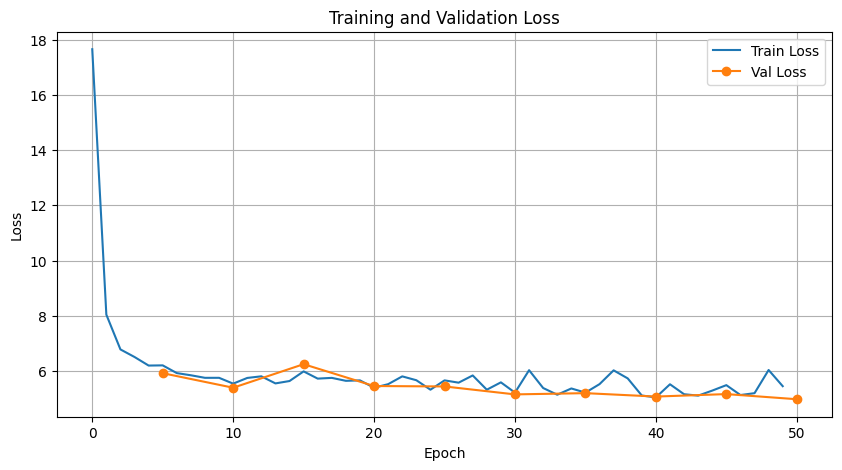

In [20]:
# Plot training loss and validation loss
losses = torch.load(os.path.join(results_dir, "losses.pt"))
plot_loss(losses["train_losses"], losses["val_losses"])

In [21]:
# Set up test dataloader
test_indices = torch.load(os.path.join(results_dir, "test_indices.pt"))
full_dataset = SimpleDataset(data_dir = "data/")
test_dataset = Subset(full_dataset, test_indices)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)

In [22]:
# Load the saved model
model = torch.load(os.path.join(results_dir, "simple_mlp_model.pt"), weights_only=False)
test_metrics = compute_test_metrics(model, test_loader)

In [23]:
test_metrics

{'precision': 0.8993705151960054,
 'recall': 0.8738301188984052,
 'f1_score': 0.886416375772083}